<a href="https://colab.research.google.com/github/sandhyaparna/Python-DataScience-CookBook/blob/master/Modeling/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Create data with column name "Age" with random ints between 5 & 100; size is number of rows/random numbers to be generated
RandomData = pd.DataFrame(np.random.randint(5,100,size=1000), columns=['Age'])
# To generate 2 or more columns with random numbers
# RandomData = pd.DataFrame(np.random.randint(5,100,size=(1000,3)), columns=['Age',"height_cm"])

# Adding time variable - generate random dates
# pd.date_range(start='1990-01-01',end='2000-12-31') creates all dates between the selected range
# np.random.choice chooses dates randomly from the above for the mentioned number of times
# range(RandomData.shape[0]) chooses dates for 1000 times i.e number of rows in RandomData table
RandomData['Date_of_Birth'] = [np.random.choice(pd.date_range(start='1990-01-01',end='2000-12-31')) for i in range(RandomData.shape[0])]
RandomData.head()

,Age,Date_of_Birth
0,5,1997-03-04
1,46,1995-02-24
2,32,1994-10-17
3,80,1994-06-30
4,60,1999-07-30


### Temporal Columns

In [4]:
TemporalData = RandomData.copy()
TemporalData['year'] = TemporalData['Date_of_Birth'].dt.year
TemporalData['month'] = TemporalData['Date_of_Birth'].dt.month
TemporalData['day'] = TemporalData['Date_of_Birth'].dt.day
TemporalData['hour'] = TemporalData['Date_of_Birth'].dt.hour
TemporalData['day_name'] = TemporalData['Date_of_Birth'].dt.day_name()
TemporalData['day'] = TemporalData['Date_of_Birth'].dt.day

TemporalData.head()

,Age,Date_of_Birth,year,month,day,hour,day_name
0,5,1997-03-04,1997,3,4,0,Tuesday
1,46,1995-02-24,1995,2,24,0,Friday
2,32,1994-10-17,1994,10,17,0,Monday
3,80,1994-06-30,1994,6,30,0,Thursday
4,60,1999-07-30,1999,7,30,0,Friday


In [5]:
# is_weekend flag 
day_names = TemporalData.Date_of_Birth.dt.day_name()
TemporalData['is_weekend'] = TemporalData['day_name'].apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)
TemporalData.head()

,Age,Date_of_Birth,year,month,day,hour,day_name,is_weekend
0,5,1997-03-04,1997,3,4,0,Tuesday,0
1,46,1995-02-24,1995,2,24,0,Friday,0
2,32,1994-10-17,1994,10,17,0,Monday,0
3,80,1994-06-30,1994,6,30,0,Thursday,0
4,60,1999-07-30,1999,7,30,0,Friday,0


In [6]:
# Here we map each temporal variable onto a circle such that the lowest value for that variable appears right next to the largest value. 
# We compute the x- and y- component of that point using the sin and cos trigonometric functions. because day, month, hour etc are cyclical features
# To convey to ML model that varibles have cyclical nature
TemporalData['day_sin'] = np.sin(TemporalData.day*(2.*np.pi/31))
TemporalData['day_cos'] = np.cos(TemporalData.day*(2.*np.pi/31))
TemporalData['month_sin'] = np.sin((TemporalData.month-1)*(2.*np.pi/12))
TemporalData['month_cos'] = np.cos((TemporalData.month-1)*(2.*np.pi/12))

In [ ]:
TemporalData[TemporalData.day==1].head()

,Age,Date_of_Birth,year,month,day,day_sin,day_cos,month_sin,month_cos
41,73,1994-04-01,1994,4,1,0.201299,0.97953,1.000000,6.123234e-17
59,68,1998-03-01,1998,3,1,0.201299,0.97953,0.866025,5.000000e-01
71,13,1996-12-01,1996,12,1,0.201299,0.97953,-0.500000,8.660254e-01
154,29,1998-11-01,1998,11,1,0.201299,0.97953,-0.866025,5.000000e-01
156,43,2000-08-01,2000,8,1,0.201299,0.97953,-0.500000,-8.660254e-01


In [ ]:
# Get the first entry for each month.
TemporalData.groupby('day').first()

,Age,Date_of_Birth,year,month,day_sin,day_cos,month_sin,month_cos
day,,,,,,,,
1,73,1994-04-01,1994,4,2.012985e-01,0.979530,1.000000e+00,6.123234e-17
2,37,2000-11-02,2000,11,3.943559e-01,0.918958,-8.660254e-01,5.000000e-01
3,24,2000-12-03,2000,12,5.712682e-01,0.820763,-5.000000e-01,8.660254e-01
4,80,1996-04-04,1996,4,7.247928e-01,0.688967,1.000000e+00,6.123234e-17
5,49,1994-01-05,1994,1,8.486443e-01,0.528964,0.000000e+00,1.000000e+00
6,49,1990-11-06,1990,11,9.377521e-01,0.347305,-8.660254e-01,5.000000e-01
7,74,2000-09-07,2000,9,9.884683e-01,0.151428,-8.660254e-01,-5.000000e-01
8,48,1995-08-08,1995,8,9.987165e-01,-0.050649,-5.000000e-01,-8.660254e-01
9,54,1999-02-09,1999,2,9.680771e-01,-0.250653,5.000000e-01,8.660254e-01


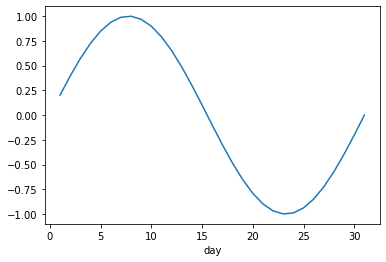

In [9]:
TemporalData.groupby('day').first().day_sin.plot()

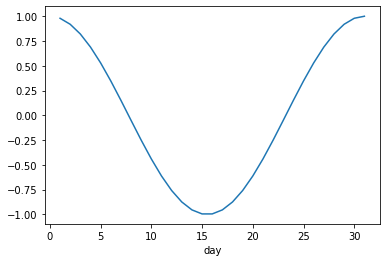

In [10]:
TemporalData.groupby('day').first().day_cos.plot()

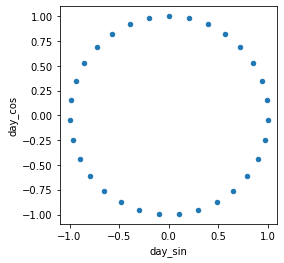

In [11]:
TemporalData.groupby('day').first().plot.scatter('day_sin','day_cos').set_aspect('equal');

In [ ]:
# For month, month_sin is on X-axis and	month_cos is on y-axis. 1 to 12 are co-ordinates of points on a circle 
TemporalData.groupby('month').first()

,Age,Date_of_Birth,year,day,day_sin,day_cos,month_sin,month_cos
month,,,,,,,,
1,49,1994-01-05,1994,5,8.486443e-01,0.528964,0.000000e+00,1.000000e+00
2,49,1992-02-19,1992,19,-6.513725e-01,-0.758758,5.000000e-01,8.660254e-01
3,53,2000-03-24,2000,24,-9.884683e-01,0.151428,8.660254e-01,5.000000e-01
4,80,1996-04-04,1996,4,7.247928e-01,0.688967,1.000000e+00,6.123234e-17
5,45,1996-05-31,1996,31,-2.449294e-16,1.000000,8.660254e-01,-5.000000e-01
6,87,1995-06-25,1995,25,-9.377521e-01,0.347305,5.000000e-01,-8.660254e-01
7,55,1993-07-21,1993,21,-8.978045e-01,-0.440394,1.224647e-16,-1.000000e+00
8,87,1995-08-10,1995,10,8.978045e-01,-0.440394,-5.000000e-01,-8.660254e-01
9,74,2000-09-07,2000,7,9.884683e-01,0.151428,-8.660254e-01,-5.000000e-01


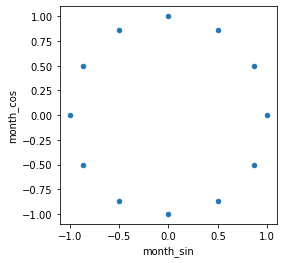

In [12]:
TemporalData.groupby('month').first().plot.scatter('month_sin','month_cos').set_aspect('equal');